In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [2]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least squares: TODO
    # returns mse, and optimal weights
    # ***************************************************
    N=len(y)
    #calculation of the best weights, we will use a linear solver
    #because if we inverse a matrix numpy uses Gausssian elimination which is unstable
    #on the other side linalg solver maybe uses QR decomposition which is more stable under
    # limited number precision
    A = np.dot(tx.T,tx)
    b = np.dot(tx.T,y)
    w = np.linalg.solve(A,b)
    
    #now that we have the weights vector, we can compute the mse
    
    e=y-np.dot(tx,w)
    mse = np.dot(e.T,e) /(2*N)
    
    return mse, w

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [3]:
from helpers import *
from grid_search import *

def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least square or grid search: TODO
    # this code should compare the optimal weights obtained 
    # by least squares vs. grid search
    # ***************************************************
    
    #here we call the function that calculates the weight vector using the normal equations
    mse_normal_equations , w_normal_equations = least_squares(y,tx)
    
    #now we need to find the best vector of weights with grid search
    w0,w1 = generate_w(200)
    losses = grid_search(y,tx,w0,w1)
    mse_grid_search, w0_grid_search, w1_grid_search = get_best_parameters(w0,w1,losses)
    
    print("normal equations loss vs grid search", mse_normal_equations, mse_grid_search)
    print("weights of the normal equation", w_normal_equations[0], w_normal_equations[1])
    print("weigths of the grid search", w0_grid_search, w1_grid_search)


Test it here

In [4]:
test_your_least_squares()

normal equations loss vs grid search 15.385887868829403 15.610085652488802
weights of the normal equation 73.29392200210505 13.479712434989228
weigths of the grid search 73.36683417085428 12.8140703517588


## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [5]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))
print(sorted(x))

shape of x (50,)
shape of y (50,)
[0.1, 0.226187455, 0.35237491, 0.478562366, 0.604749821, 0.730937276, 0.857124731, 0.983312187, 1.109499642, 1.235687097, 1.361874552, 1.488062008, 1.614249463, 1.740436918, 1.866624373, 1.992811829, 2.118999284, 2.245186739, 2.371374194, 2.49756165, 2.623749105, 2.74993656, 2.876124015, 3.002311471, 3.128498926, 3.254686381, 3.380873836, 3.507061292, 3.633248747, 3.759436202, 3.885623657, 4.011811113, 4.137998568, 4.264186023, 4.390373478, 4.516560934, 4.642748389, 4.768935844, 4.895123299, 5.021310755, 5.14749821, 5.273685665, 5.39987312, 5.526060576, 5.652248031, 5.778435486, 5.904622941, 6.030810397, 6.156997852, 6.283185307]


In [6]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # polynomial basis function: TODO
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    # ***************************************************
    
    Phi = np.ones((len(x), degree+1))
    for j in range(1,degree+1):
        Phi[:,j] = Phi[:,j-1] * x
    return Phi

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [7]:
from costs import calculate_mse
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1,3,7, 51]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # ***************************************************
        # form the data to do polynomial regression.: TODO
        # ***************************************************
        Phi = build_poly(x,degree)
        
        
        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate RMSE: TODO
        # ***************************************************
        mse, weights = least_squares(y,Phi)
        rmse = np.sqrt(2*mse)
        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

Processing 1th experiment, degree=1, rmse=0.47187607963421874
Processing 2th experiment, degree=3, rmse=0.2585827766773748
Processing 3th experiment, degree=7, rmse=0.24965870360907474
Processing 4th experiment, degree=51, rmse=0.23190805135041986


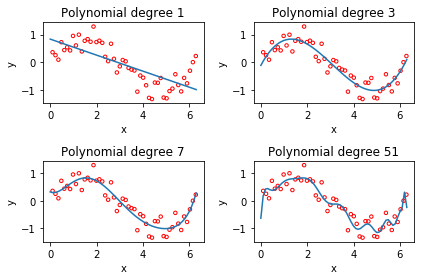

In [8]:
polynomial_regression()

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [9]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    
    """
    so ration * dataset = training
    and (1-ratio) * dataset = testing
    """
    # set seed
    np.random.seed(seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data based on the given ratio: TODO
    # ***************************************************
    # n = the number of samples
    n = len(y)
    training_size = int(ratio * n)
    # choose the training indices
    tr_idxs = np.random.choice(n,training_size,replace=False)
    
    #choose the test indices (the must be the indices not already selected to be the training indices)
    test_idxs = [i for i in range(0,n) if i not in tr_idxs]
    
    y_tr = y[tr_idxs]
    x_tr = x[tr_idxs]
    
    y_test = y[test_idxs]
    x_test = x[test_idxs]
    
    return y_tr, x_tr, y_test, x_test

Then, test your `split_data` function below.

In [10]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    y_tr, x_tr, y_test, x_test = split_data(x,y,ratio)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    Phi_tr = build_poly(x_tr, degree)
    Phi_test = build_poly(x_test, degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calcualte weight through least square.: TODO
    # ***************************************************
    mse_tr, w_tr = least_squares(y_tr, Phi_tr)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    # ***************************************************
    rmse_tr = np.sqrt(2 * mse_tr)
    
    # we compute the mse of the test set using the best weights for the training set
    mse_te = compute_loss(y_test, Phi_test, w_tr)
    rmse_te = np.sqrt(2 * mse_te)
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))


In [11]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.455, Testing RMSE=0.621
proportion=0.9, degree=3, Training RMSE=0.264, Testing RMSE=0.214
proportion=0.9, degree=7, Training RMSE=0.257, Testing RMSE=0.189
proportion=0.9, degree=12, Training RMSE=0.249, Testing RMSE=0.231
proportion=0.5, degree=1, Training RMSE=0.400, Testing RMSE=0.553
proportion=0.5, degree=3, Training RMSE=0.237, Testing RMSE=0.306
proportion=0.5, degree=7, Training RMSE=0.218, Testing RMSE=0.336
proportion=0.5, degree=12, Training RMSE=0.213, Testing RMSE=0.347
proportion=0.1, degree=1, Training RMSE=0.453, Testing RMSE=0.748
proportion=0.1, degree=3, Training RMSE=0.111, Testing RMSE=0.674
proportion=0.1, degree=7, Training RMSE=0.000, Testing RMSE=1.792
proportion=0.1, degree=12, Training RMSE=0.000, Testing RMSE=2.463


# 3 Ridge Regression
Please fill in the function below.

In [12]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    N = len(y)
    d = tx.shape[1]
    _lambda = 2 * N * lambda_ 
    #as usually we will use a linear solver
    A = _lambda * np.identity(d) + np.dot(tx.T,tx)
    b = np.dot(tx.T,y)
    print(np.dot(tx.T,tx).shape)
    w = np.linalg.solve(A,b)
    return w

In [13]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    y_tr, x_tr, y_test, x_test = split_data(x,y,ratio)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    Phi_tr = build_poly(x_tr, degree)
    Phi_test = build_poly(x_test, degree)
    
    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # ridge regression with a given lambda
        # ***************************************************
        w_tr = ridge_regression(y_tr, Phi_tr, lambda_)
        
        #now I will calculate the mse error for the training set and the test set
        #given the output weight vector w_tr of the ridge regression procedure
        mse_tr = compute_loss(y_tr, Phi_tr, w_tr)
        rmse_tr.append(np.sqrt(2 * mse_tr))
        
        mse_te = compute_loss(y_test, Phi_test, w_tr)
        rmse_te.append(np.sqrt(2 * mse_te))
        
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)



(8, 8)
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.220, Testing RMSE=0.319
(8, 8)
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.222, Testing RMSE=0.319
(8, 8)
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.225, Testing RMSE=0.322
(8, 8)
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.226, Testing RMSE=0.325
(8, 8)
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.327
(8, 8)
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.228, Testing RMSE=0.329
(8, 8)
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.228, Testing RMSE=0.329
(8, 8)
proportion=0.5, degree=7, lambda=0.003, Training RMSE=0.229, Testing RMSE=0.327
(8, 8)
proportion=0.5, degree=7, lambda=0.007, Training RMSE=0.229, Testing RMSE=0.319
(8, 8)
proportion=0.5, degree=7, lambda=0.016, Training RMSE=0.232, Testing RMSE=0.302
(8, 8)
proportion=0.5, degree=7, lambda=0.037, Training RMSE=0.239, Testing RMSE=0.279
(8, 8)
proportion=0.5, degree=7, lambda=0.0

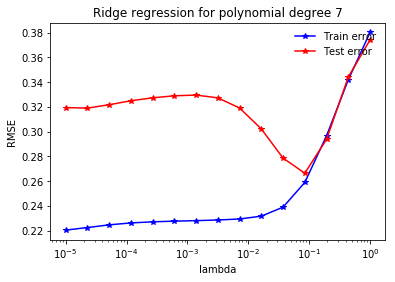

In [14]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)

Here we wiil make the experiment described in the exercise03 pdf to understand the importance of the condition number
A very big condition number means a system that is not stable numerically

In [17]:
X = np.array([[400,-201],[-800, 401]])
y = np.array([200,-200])

X_ = np.array([[401,-201],[-800, 401]])


mse, w = least_squares(y,X)
mse_ , w_ = least_squares(y,X_)

print(w, mse)
print(w_ , mse_)

print(np.linalg.cond(X))

[ -99.99999999 -199.99999998] 2.3506289251939907e-17
[40000.12981314 79800.25897915] 2.0938488423140333e-08
2503.0046004808573
